
# Big Ideas Final Project
## Metric: Overdose Deaths
### Lukas Finn

For my analysis of the pittsburgh neighborhoods, I chose to analyze the amount of accidental overdoses. This dataset contains the incidents of overdose deaths in all of Allegheny county since 2007, collecting information on age, sex, race, and the drug(s) that caused the deaths. For my metric, the best neighborhood to live in is the one with the least amount of overdose deaths.

Link: https://data.wprdc.org/dataset/allegheny-county-fatal-accidental-overdoses

---
---
## Starting The Analysis
First, I imported everything that was necessary for the analysis and loaded in the dataset:

In [128]:
# importing everything necessary
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

# reading dataset
dose = pd.read_csv("overdosedata.tsv",sep='\t')

Next, I collected some basic statistics from the data:

In [137]:
# finding total overdose count
casecount = len(dose)

# finding average age
aveage = dose['age'].mean()

# finding count of victims based on sex
se = dose['sex'].value_counts()

# printing findings
print('\n''Number of cases:',casecount)
print('\n''Average age of victim:',aveage)
print('\n''Number of male (M) and female (F) victims:''\n')
print(se)


Number of cases: 5832

Average age of victim: 41.818930041152264

Number of male (M) and female (F) victims:

M    4004
F    1827
Name: sex, dtype: int64


### Findings after initial analysis: 
      - 5832 total cases
      
      - about 2/3 of victims are male
      
      - average age of victim is 42

---
## Analysis Of Substances
Next, I wanted to see which substances caused the most overdoses. After going through the data, I took the top 10 most lethal substances from the results and put it into a bar graph:


Top 10 causes of overdose counts:

('Diazepam', 281)
('Morphine', 368)
('Methadone', 443)
('Acetyl Fentanyl', 453)
('Oxycodone', 542)
('Alprazolam', 701)
('Alcohol', 1358)
('Cocaine', 2200)
('Heroin', 2390)
('Fentanyl', 2912)


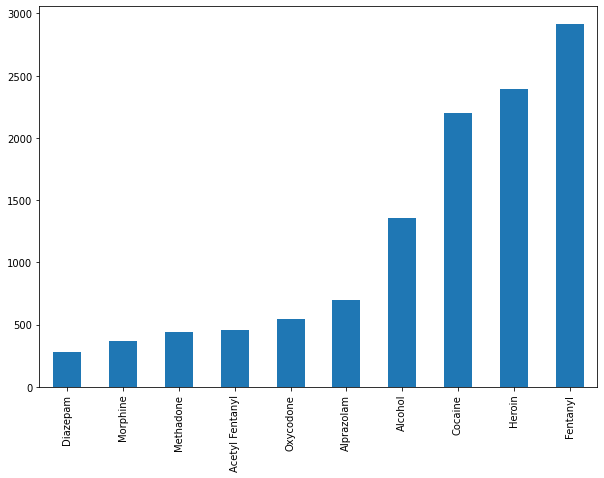

In [138]:
# creating a dictionary to store all substances
cause = dict()

# going through dataset to fill dictionary
for line in dose:
    causecol = dose['combined_od1']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od2']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od3']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od4']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od5']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od6']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od7']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1
    causecol = dose['combined_od8']
    for item in causecol:
        if item in cause:
            cause[item] += 1
        else:
            cause[item] = 1

# fixing values recorded (somehow all were multiplied by 19)
for reason, value in cause.items():
    cause[reason] = int(value/19)
    
# sorting data by turning it into a list, then back into a dictionary
causelist = sorted(cause.items(), key = lambda x:x[1])
cause = dict(causelist)

# printing findings
print('\n''Top 10 causes of overdose counts:''\n')
for x in causelist[158:168]:
    print (x)

# graphing findings by converting dictionary into dataframe
seframe = pd.DataFrame(cause.values(), index = cause.keys())
causeframe[158:168].plot.bar(legend = False, figsize=(10, 7))

### Findings after substance analysis: 
      - substances with the most associated deaths included Alcohol, Cocaine, Heroin, and Fentanyl
      
      - each of these substances had over 1000 deaths associated with their consumption

---
## Analysis By Neighborhood
The next step was analyzing the amount of overdoses by neighborhoods. Sadly, the dataset was sorted by zip code. This meant that everything had to be sorted manually.
I began by sorting the data by zip code:

In [139]:
# creating a dictionary of all zipcodes with overdoses
zipcount = dict()

# going through dataset to fil dictionary
for line in dose:
    zipcol = dose['incident_zip']
    for item in zipcol:
        if item in zipcount:
            zipcount[item] += 1
        else:
            zipcount[item] = 1

# fixing values recorded (somehow all were multiplied by 19)
for zipcode, value in zipcount.items():
    zipcount[zipcode] = int(value/19)

Next, I had to (very painfully) manually assign each zip code to each corresponding neighborhood, as there was no simple way to loop through all neighborhoods and automatically assign zip codes. Some neighborhoods were within multiple zip codes, which may cause slight miscalculations in overdose counts, but this was unavoidable from the data set. This was the process:

In [144]:
# creating a dictionary to hold all neighborhoods
neighborhoodscount = dict()

# manually assigning every neighborhood to their zipcode(s)
neighborhoodscount['Allegheny Center']= zipcount['15212']
neighborhoodscount['Allegheny West']= zipcount['15233'] + zipcount['15212']
neighborhoodscount['Allentown']= zipcount['15210']
neighborhoodscount['Arlington']= zipcount['15210']
neighborhoodscount['Arlington Heights']= zipcount['15210']
neighborhoodscount['Banksville']= zipcount['15220'] + zipcount['15216']
neighborhoodscount['Bedford Dwellings']= zipcount['15219']
neighborhoodscount['Beechview']= zipcount['15216']
neighborhoodscount['Beltzhoove']= zipcount['15210']
neighborhoodscount['Bloomfield']= zipcount['15224']
neighborhoodscount['Bluff']= zipcount['15219']
neighborhoodscount['Bon Air']= zipcount['15226'] + zipcount['15210']
neighborhoodscount['Brighton Heights']= zipcount['15212']
neighborhoodscount['Brookline']=  zipcount['15226']
neighborhoodscount['California-Kirkbride']= zipcount['15212'] +  zipcount['15233']
neighborhoodscount['Carrick']= zipcount['15210'] +  zipcount['15227']
neighborhoodscount['Central Business District']=  zipcount['15222']
neighborhoodscount['Central Lawrenceville']= zipcount['15201']
neighborhoodscount['Central Northside']= zipcount['15212']
neighborhoodscount['Central Oakland']= zipcount['15213']
neighborhoodscount['Chartiers']= zipcount['15204']
neighborhoodscount['Chateau']= zipcount['15233']
neighborhoodscount['Crafton Heights']= zipcount['15205']
neighborhoodscount['Crawford-Roberts']= zipcount['15219']
neighborhoodscount['Duquesne Heights']= zipcount['15211']
neighborhoodscount['East Allegheny']= zipcount['15212']
neighborhoodscount['East Carnegie']= zipcount['15206']
neighborhoodscount['East Hills']= zipcount['15221']
neighborhoodscount['East Liberty']= zipcount['15206']
neighborhoodscount['Elliott']= zipcount['15220']
neighborhoodscount['Esplen']= zipcount['15204']
neighborhoodscount['Fairywood']= zipcount['15205']
neighborhoodscount['Fineview']= zipcount['15212'] +  zipcount['15214']
neighborhoodscount['Friendship']= zipcount['15232']
neighborhoodscount['Garfield']= zipcount['15224']
neighborhoodscount['Glen Hazel']= zipcount['15207'] +  zipcount['15217']
neighborhoodscount['Greenfield']= zipcount['15207'] +  zipcount['15217']
neighborhoodscount['Hays']=  zipcount['15227'] + zipcount['15207'] + zipcount['15236']
neighborhoodscount['Hazelwood']= zipcount['15207']
neighborhoodscount['Highland Park']= zipcount['15206']
neighborhoodscount['Homewood North']= zipcount['15221'] + zipcount['15208']
neighborhoodscount['Homewood South']= zipcount['15221'] + zipcount['15208']
neighborhoodscount['Homewood West']= zipcount['15206'] +  zipcount['15208']
neighborhoodscount['Knoxville']= zipcount['15210']
neighborhoodscount['Larimer']= zipcount['15206']
neighborhoodscount['Lincoln–Lemington–Belmar']= zipcount['15206'] + zipcount['15147'] + zipcount['15215']
neighborhoodscount['Lincoln Place']= zipcount['15207']
neighborhoodscount['Lower Lawrenceville']= zipcount['15201']
neighborhoodscount['Manchester']= zipcount['15233']
neighborhoodscount['Marshall-Shadeland']= zipcount['15212'] + zipcount['15214']
neighborhoodscount['Middle Hill']= zipcount['15219']
neighborhoodscount['Morningside']= zipcount['15201'] + zipcount['15206']
neighborhoodscount['Mount Oliver']= zipcount['15210']
neighborhoodscount['Mount Washington']= zipcount['15211']
neighborhoodscount['New Homestead']=  zipcount['15207']
neighborhoodscount['North Oakland']= zipcount['15213']
neighborhoodscount['North Point Breeze']= zipcount['15208']
neighborhoodscount['North Shore']= zipcount['15212']
neighborhoodscount['Northview Heights']= zipcount['15212'] +  zipcount['15214']
neighborhoodscount['Oakwood']= zipcount['15205']
neighborhoodscount['Overbrook']= zipcount['15227'] + zipcount['15234'] + zipcount['15210']
neighborhoodscount['Perry North']= zipcount['15212'] + zipcount['15214']
neighborhoodscount['Perry South']= zipcount['15214']
neighborhoodscount['Point Breeze']= zipcount['15217'] + zipcount['15208']
neighborhoodscount['Polish Hill']= zipcount['15219']
neighborhoodscount['Regent Square']= zipcount['15218']
neighborhoodscount['Ridgemont']= zipcount['15220'] + zipcount['15216']
neighborhoodscount['Saint Clair']= zipcount['15210']
neighborhoodscount['Shadyside']= zipcount['15206'] + zipcount['15213'] +  zipcount['15232']
neighborhoodscount['Sheraden']=  zipcount['15204']
neighborhoodscount['South Oakland']= zipcount['15213']
neighborhoodscount['Southshore']= zipcount['15219']
neighborhoodscount['South Side Flats']= zipcount['15203']
neighborhoodscount['South Side Slopes']=  zipcount['15203'] + zipcount['15210']
neighborhoodscount['Spring Garden']= zipcount['15212']
neighborhoodscount['Spring Hill–City View']= zipcount['15212']
neighborhoodscount['Squirrel Hill North']= zipcount['15217']
neighborhoodscount['Squirrel Hill South']= zipcount['15217']
neighborhoodscount['Stanton Heights']= zipcount['15201'] + zipcount['15206']
neighborhoodscount['Strip District']= zipcount['15222']
neighborhoodscount['Summer Hill']= zipcount['15214']
neighborhoodscount['Swisshelm Park']= zipcount['15218']
neighborhoodscount['Terrace Village']= zipcount['15219']
neighborhoodscount['Troy Hill']= zipcount['15212']
neighborhoodscount['Upper Hill']= zipcount['15219']
neighborhoodscount['Upper Lawrenceville']= zipcount['15201']
neighborhoodscount['West End']= zipcount['15220']
neighborhoodscount['West Oakland']= zipcount['15213']
neighborhoodscount['Westwood']= zipcount['15205'] + zipcount['15220']
neighborhoodscount['Windgap']= zipcount['15204']

# sorting data by turning it into a list, then back into a dictionary
hoodlist = sorted(neighborhoodscount.items(), key = lambda x:x[1])
neighborhoodscount = dict(hoodlist)

Next, I went through the data, and pulled the top 10 neighborhoods with the least overdoses and top 10 neighborhoods with the most overdoses:

In [168]:
# printing findings
print('Top 10 neighborhoods with lowest overdose counts:''\n')
for x in hoodlist[0:10]:
    print (x)
print('\n''Top 10 neighborhoods with highest overdose counts:''\n')
for x in hoodlist[80:90]:
    print (x)

Top 10 neighborhoods with lowest overdose counts:

('Chateau', 14)
('Manchester', 14)
('Friendship', 15)
('Central Business District', 36)
('Strip District', 36)
('Squirrel Hill North', 39)
('Squirrel Hill South', 39)
('Central Oakland', 44)
('North Oakland', 44)
('South Oakland', 44)

Top 10 neighborhoods with highest overdose counts:

('Saint Clair', 295)
('Fineview', 309)
('Marshall-Shadeland', 309)
('Northview Heights', 309)
('Perry North', 309)
('Hays', 324)
('South Side Slopes', 371)
('Bon Air', 401)
('Carrick', 441)
('Overbrook', 499)


### Findings after neighborhood analysis: 
      - top 3 best neighborhoods are Chateau, Manchester, and Friendship
      
      - top 3 worst neighborhoods are Bon Air, Carrick, and Overbrook

---
## Graphing Neighborhood Analysis

Next, I graphed the data I found through my analysis:

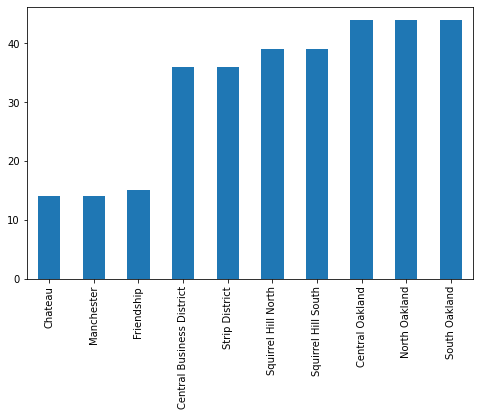

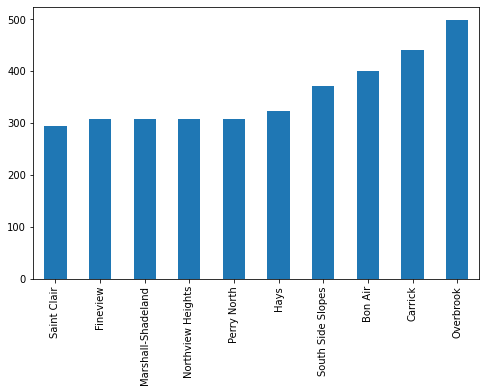

In [171]:
# graphing findings by converting dictionary into dataframe
hoodframe = pd.DataFrame(neighborhoodscount.values(), index = neighborhoodscount.keys())
hoodframe[0:10].plot.bar(legend = False, figsize=(8, 5))
hoodframe[80:90].plot.bar(legend = False, figsize=(8, 5))

The differences in these graphs may not look like much when seperate, but compare it to when all neighborhood values are shown:

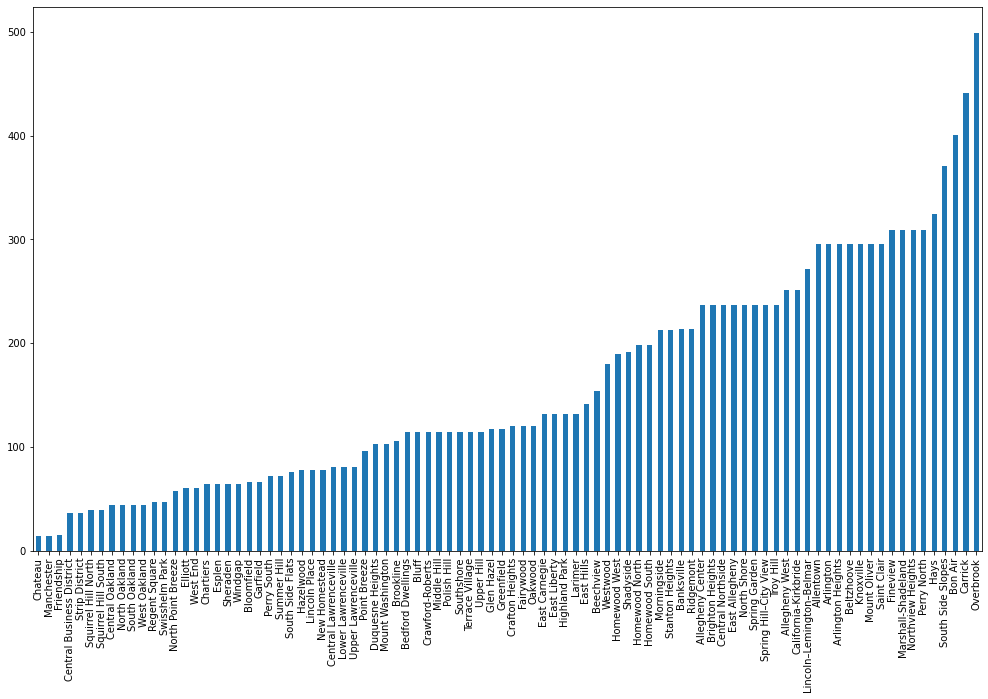

In [169]:
# graphing all of the neighborhoods
hoodframe[0:90].plot.bar(legend = False, figsize=(17, 10))

I then proceeeded to graph the following data on a map of all the pittsburgh neighborhoods. This paints a clear picture of where overdoses are more concentrated and where there are little to no overdoses:

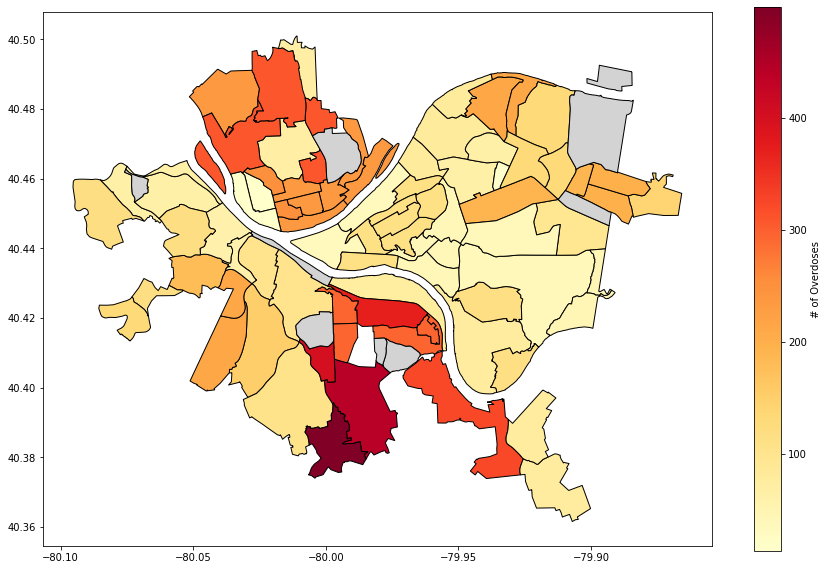

In [176]:
# reading file for mapping
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# preparing data to be put into a dataframe
hoods = neighborhoodscount.keys()
doses = neighborhoodscount.values()
hoodframe2 = pd.DataFrame({'Neighborhood': hoods, 'Overdoses': doses})

# merging dataframes
overmap = neighborhoods.merge(hoodframe2, how='left', left_on='hood', right_on='Neighborhood')

#graphing the map
overmap.plot(column='Overdoses', cmap='YlOrRd', edgecolor="black",
legend=True, legend_kwds={'label': "# of Overdoses"}, figsize=(15, 10),
missing_kwds={"color": "lightgrey"})